# Clasificación Multiclase con MLPClassifier
Este notebook muestra cómo entrenar y visualizar un perceptrón multicapa (MLP) para clasificar datos sintéticos. Se explican los pasos principales: generación de datos, entrenamiento, evaluación y visualización de la superficie de decisión.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

## Generación de datos
Utilizamos `make_blobs` para generar un conjunto de datos sintéticos con 4 centros (clases).

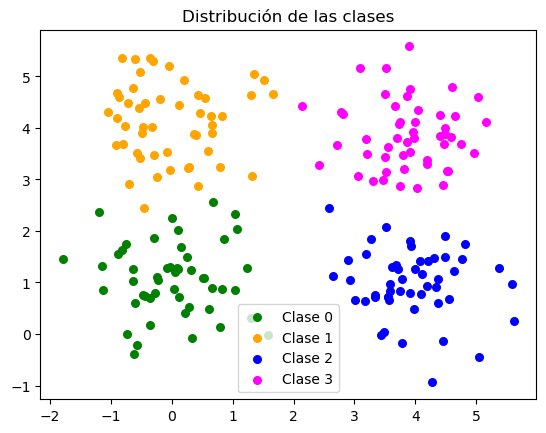

In [2]:
# Parámetros de red neuronal
hidden_layer_sizes = (3, )  # Cantidad de capas ocultas y neuronas por capa

n_samples = 200
blob_centers = ([0, 1], [0, 4], [ 4, 1], [4, 4])
data, labels = make_blobs(n_samples=n_samples,
                          centers=blob_centers,
                          cluster_std=0.7,
                          random_state=0)

# Visualización inicial
colours = ('green', 'orange', 'blue', 'magenta')
fig, ax = plt.subplots()
for n_class in range(len(blob_centers)):
    ax.scatter(data[labels==n_class][:, 0],
               data[labels==n_class][:, 1],
               c=colours[n_class], s=30,
               label=f"Clase {n_class}")
plt.legend()
plt.title("Distribución de las clases")
plt.show()

## División en entrenamiento y prueba
Dividimos los datos en 80% para entrenamiento y 20% para prueba usando `train_test_split`.

In [16]:
train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, test_size=0.2, random_state=42)

## Entrenamiento del clasificador MLP
Entrenamos un MLPClassifier con el solver `lbfgs` y visualizamos la precisión.

In [17]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=hidden_layer_sizes,
                    random_state=1)
clf.fit(train_data, train_labels)

predictions_train = clf.predict(train_data)
predictions_test = clf.predict(test_data)
train_score = accuracy_score(predictions_train, train_labels)
test_score = accuracy_score(predictions_test, test_labels)
print("Precisión sobre datos de entrenamiento: ", train_score)
print("Precisión sobre datos de prueba: ", test_score)

Precisión sobre datos de entrenamiento:  0.99375
Precisión sobre datos de prueba:  0.975


## Visualización de la superficie de decisión
Se grafica la región de decisión aprendida por el modelo MLP junto con los datos reales.

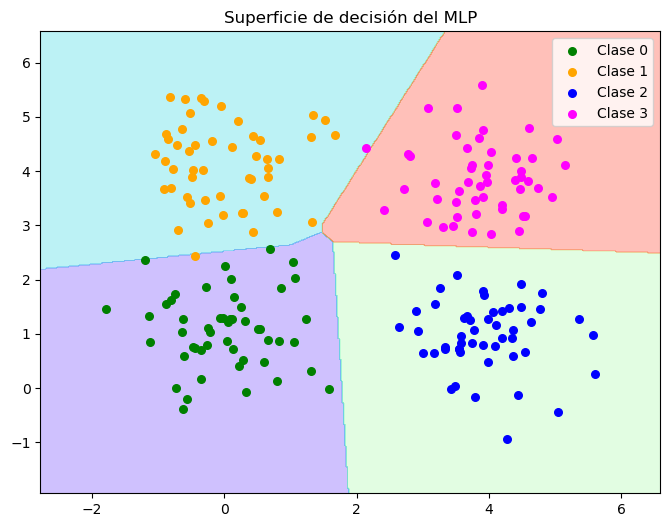

In [18]:
# Definir los límites del gráfico
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
h = 0.02  # resolución de la malla
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.rainbow)
for n_class in range(len(blob_centers)):
    plt.scatter(data[labels==n_class][:, 0],
                data[labels==n_class][:, 1],
                c=colours[n_class], s=30,
                label=f"Clase {n_class}")
plt.title("Superficie de decisión del MLP")
plt.legend()
plt.show()